# Orders - Multivariate Regression of review_score

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
''' You can download the solution for yesterday's optional distance_seller_customer function from Kitt 
and paste it into your olist/orders.py file, if you weren't able to complete it '''
# import orders dataset
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix below, we notice that `review_score` is mostly correlated with the two features `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other one constant**.

<AxesSubplot:>

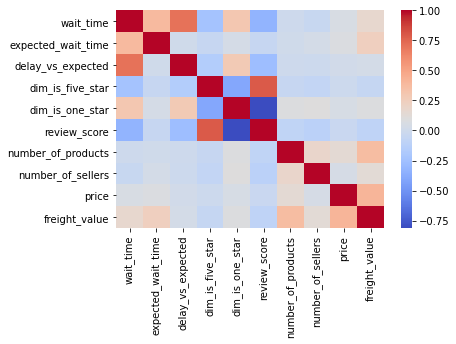

In [4]:
sns.heatmap(orders.corr(), cmap='coolwarm')

(0.0, 5.9311962634221445)

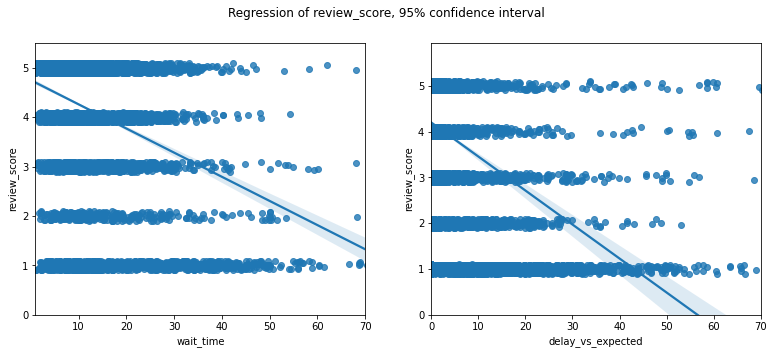

In [5]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, Print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric R-squared, as well as individual regression coefficients, t-values, p-values, and 95% confidence intervals

In [6]:
import statsmodels.formula.api as smf

In [7]:
model1 = smf.ols(formula='review_score ~ wait_time', data=orders).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.225e+04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:25:59   Log-Likelihood:            -1.5707e+05
No. Observations:               97007   AIC:                         3.142e+05
Df Residuals:                   97005   BIC:                         3.142e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7138      0.006    726.803      0.000       4.701       4.727
wait_time     -0.0455      0.000   -110.664      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19241.637   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34157.401
Skew:                          -1.282   Prob(JB):                         0.00
Kurtosis:                       4.371   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model2 = smf.ols(formula='review_score ~ delay_vs_expected', data=orders).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7743.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:26:00   Log-Likelihood:            -1.5912e+05
No. Observations:               97007   AIC:                         3.182e+05
Df Residuals:                   97005   BIC:                         3.183e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.1997      0.004   1034.674      0.000       4.192       4.208
delay_vs_expected    -0.0742      0.001    -87.995      0.000      -0.076      -0.073
==============================================================================
Omnibus:                    20264.119   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46233.422
Skew:                          -1.191   Prob(JB):                         0.00
Kurtosis:                       5.401   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

In [9]:
model3 = smf.ols(formula='review_score ~ delay_vs_expected + wait_time', data=orders).fit()
model3.params

Intercept            4.643971
delay_vs_expected   -0.019144
wait_time           -0.038752
dtype: float64

----
❓Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **partial correlation** coefficients. Can you notice the difference with the **simple regression** coeffients computed with seaborn above? What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


Holding wait_time constant, the impact of adding one day of `delay_vs_expected` is -0.007 -- pretty small!  In fact, before, when we were looking at just one variable, it seemed `delay_vs_expected` had a greater impact than `wait_time` on `review_score`. But with multivariate regression and partial correlation coefficients, we see that actually, the `wait_time` was influencing the `delay_vs_expected` regression results. When we isolate `delay_vs_expected`, holding `wait_time` constant, we see there is not much of an influence on `review_score`.

<details>
    <summary>💡 Solution</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0191 [0.017 - 0.21] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0388 points 

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

In [10]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6275.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:26:00   Log-Likelihood:            -1.5694e+05
No. Observations:               97007   AIC:                         3.139e+05
Df Residuals:                   97004   BIC:                         3.139e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6440      0.008    599.083      0.000       4.629       4.659
delay_vs_expected    -0.0191      0.001    -16.399      0.000      -0.021      -0.017
wait_time            -0.0388      0.001    -66.715      0.000      -0.040      -0.038
==============================================================================
Omnibus:                    19637.196   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38268.583
Skew:                          -1.235   Prob(JB):                         0.00
Kurtosis:                       4.834   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
❓ R-squared is quite low: no more than 12% of the variation of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. Let's try to add more features to our regression to improve explainability.

- Create a new OLS `model4` with more features from `orders` dataset.
    - Do not create **data leaks**: do not add features that are directly derived from the `review_score`
    - Do not add two features perfectly colinear with each other
    - Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ are not of the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

In [11]:
orders.columns

Index(['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected',
       'order_status', 'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_products', 'number_of_sellers', 'price', 'freight_value'],
      dtype='object')

In [12]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# Select features
#features_mask = ['wait_time', 'expected_wait_time', 'delay_vs_expected', 'number_of_products', 'number_of_sellers', 'price', 'freight_value', 'distance_seller_customer']
features_mask = ['wait_time', 'expected_wait_time', 'delay_vs_expected', 'number_of_products', 'number_of_sellers', 'price', 'freight_value']

In [16]:
X_variables = orders[features_mask]

In [17]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [18]:
1/(1-smf.ols(formula = f'review_score ~ {("+").join(features_mask)}', data=orders).fit().rsquared)

1.1653931009907506

In [19]:
vif_data

,feature,VIF
0,wait_time,7.755583
1,expected_wait_time,11.566364
2,delay_vs_expected,2.471889
3,number_of_products,1.611938
4,number_of_sellers,8.315102
5,price,1.720346
6,freight_value,3.127611


In [20]:
# standardize features (transform them into their respective z-scores)
order_z_scores = orders.copy()
for feature in features_mask:
    feature_z_score = feature + '_z_score'
    order_z_scores[feature_z_score] = (order_z_scores[feature] - order_z_scores[feature].mean()) / order_z_scores[feature].std()
    

In [21]:
order_z_scores['review_score'] = orders['review_score']

In [25]:
feature_z_score

'freight_value_z_score'

In [23]:
order_z_scores

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,wait_time_z_score,expected_wait_time_z_score,delay_vs_expected_z_score,number_of_products_z_score,number_of_sellers_z_score,price_z_score,freight_value_z_score
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544062,0.0,delivered,0,0,4,1,1,29.99,8.72,-0.432597,-0.936198,-0.16311,-0.161452,-0.112854,-0.512242,-0.652992
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,0.127585,-0.526056,-0.16311,-0.161452,-0.112854,-0.087186,-0.000959
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,-0.332241,0.330125,-0.16311,-0.161452,-0.112854,0.110225,-0.165361
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,0.067507,0.278666,-0.16311,-0.161452,-0.112854,-0.440321,0.205239
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,-1.015545,-1.327886,-0.16311,-0.161452,-0.112854,-0.560588,-0.652992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97010,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,1,0,5,1,1,72.00,13.08,-0.455502,-0.588863,-0.16311,-0.161452,-0.112854,-0.310950,-0.450509
97011,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,0,0,4,1,1,174.90,20.10,1.009096,-0.032877,-0.16311,-0.161452,-0.112854,0.182098,-0.124493
97012,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,1,0,5,1,1,205.99,65.02,1.288449,0.757478,-0.16311,-0.161452,-0.112854,0.331067,1.961642
97013,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,0,0,2,3,1,359.98,81.18,0.473871,1.524534,-0.16311,0.711569,-0.112854,1.068914,2.712130


In [27]:
features_z_score

['wait_time_z_score',
 'expected_wait_time_z_score',
 'delay_vs_expected_z_score',
 'number_of_products_z_score',
 'number_of_sellers_z_score',
 'price_z_score',
 'freight_value_z_score']

In [30]:
features_z_score

['wait_time_z_score',
 'expected_wait_time_z_score',
 'delay_vs_expected_z_score',
 'number_of_products_z_score',
 'number_of_sellers_z_score',
 'price_z_score',
 'freight_value_z_score']

In [26]:
# Create and train model4
features_z_score = [feature+'_z_score' for feature in features_mask]
model4 = smf.ols(formula=f'review_score ~ {("+").join(features_z_score)}', data=order_z_scores).fit()

In [28]:
model4.params

Intercept                     4.142237
wait_time_z_score            -0.465662
expected_wait_time_z_score    0.119334
delay_vs_expected_z_score    -0.026804
number_of_products_z_score   -0.086092
number_of_sellers_z_score    -0.155763
price_z_score                -0.005096
freight_value_z_score        -0.013435
dtype: float64

In [29]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2292.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:31:58   Log-Likelihood:            -1.5542e+05
No. Observations:               97007   AIC:                         3.108e+05
Df Residuals:                   96999   BIC:                         3.109e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.1422      0.004   1074.150      0.000       4.135       4.150
wait_time_z_score             -0.4657      0.007    -71.337      0.000      -0.478      -0.453
expected_wait_time_z_score     0.1193      0.005     25.762      0.000       0.110       0.128
delay_vs_expected_z_score     -0.0268      0.006     -4.473      0.000      -0.039      -0.015
number_of_products_z_score    -0.0861      0.004    -20.429      0.000      -0.094      -0.078
number_of_sellers_z_score     -0.1558      0.004    -39.515      0.000      -0.163      -0.148
price_z_score                 -0.0051      0.004     -1.204      0.229      -0.013       0.003
freight_value_z_score         -0.0134      0.005     -2.861      0.004      -0.023      -0.004
==============================================================================
Omnibus:                    18808.396   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36074.831
Skew:                          -1.193   Prob(JB):                         0.00
Kurtosis:                       4.797   Cond. No.                         3.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [ ]:
model4_df = pd.DataFrame(model4.params)
model4_df.reset_index(inplace=True)
model4_df
#model4_df.set_index('index', inplace=True)
model4_df = model4_df.rename(columns={'index':'feature',0:'beta1 coefficients'})
model4_df = model4_df.loc[1:]
model4_df.set_index('feature', inplace=True)
model4_df.plot(kind='bar')

R-squared has only gone up by a few points. Not a big difference. So overall performance of the regression has not improved much. That is, our variables don't explain most of the review scores.

The F Statistic has actually gone down compared to the simpler 2 variable regression, but it's still well above 1, so still significant. 

The p-value for `freight_value` is above .05, so probably not significant 

`Wait_time` remains the most correlated variable with `review_score`, holding other variables constant. The next highest review score correlations, holding other variables constant, are with `number_of_sellers` and `number_of_products`

<details>
    <summary>💡Explanations</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score`. 
- Distance also plays a role.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of review_score lies outside of the orders dataset.

Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

Regression performance should not be measured only by it's R-squared!  
Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals, notice how their mean is equal to 0 (always the case in linear regression), and compute the associated RMSE.   
Plot the `residuals` in a histogram.

In [31]:
features_z_score

['wait_time_z_score',
 'expected_wait_time_z_score',
 'delay_vs_expected_z_score',
 'number_of_products_z_score',
 'number_of_sellers_z_score',
 'price_z_score',
 'freight_value_z_score']

In [ ]:
order_z_scores[features_z_score]

In [32]:
y_predicted = model4.predict(order_z_scores[features_z_score])
y_predicted


0        4.279194
1        4.056356
2        4.373854
3        4.179393
4        4.504155
           ...   
97010    4.327563
97011    3.705011
97012    3.640457
97013    4.022308
97014    4.439948
Length: 97007, dtype: float64

In [33]:
y = order_z_scores['review_score']
residuals = y - y_predicted
residuals

0       -0.279194
1       -0.056356
2        0.626146
3        0.820607
4        0.495845
           ...   
97010    0.672437
97011    0.294989
97012    1.359543
97013   -2.022308
97014    0.560052
Length: 97007, dtype: float64

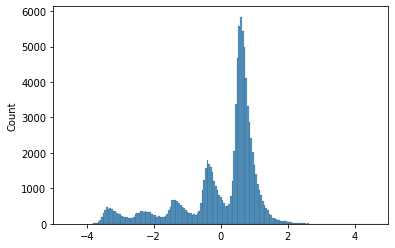

In [34]:
sns.histplot(residuals)
plt.xlim(-5,5);

In [35]:
residuals.mean()

1.6755146618813377e-16

In [36]:
rmse = np.sqrt(sum((y_predicted-y)**2/order_z_scores.shape[0]))
rmse

1.201029902273158

❓ Can you guess why the residual distplot is such a strange shape? To understand, plot on the same axis the histogram of `review_score` as well as that of the `predicted_review_score` for each row of the dataset

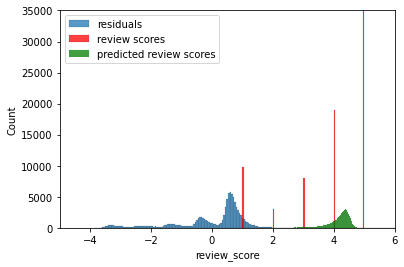

In [37]:
sns.histplot(residuals, label='residuals')
sns.histplot(order_z_scores['review_score'], label='review scores', color='red')
sns.histplot(y_predicted, label='predicted review scores', color='green')
plt.xlim(-5,6)
plt.ylim(0,35_000)
plt.legend()

<details>
    <summary>💡Explanations</summary>

☝️ Our model is not so great, for two reasons
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Secondly, because we are trying to fit a "linear regression" function to a discreet classification problem

Tomorrow, you will discover a new model: the logistic regression classifier
    
</details>

🏁 Great job! Don't forget to *save*, *commit* and *push* this notebook when you are done